In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
from os.path import basename
import math
import os

# naive thresholds

In [9]:
z_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/COMBINED"
ld_dir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA"
ld_files = glob.glob(ld_dir+"/*_r2.txt")
outdir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals_pruned/confidence_intervals/plots"

In [6]:
def plot_locus(ldFile, zFile, title, outFile):
    ld = pd.read_table(ldFile)
    z = pd.read_table(zFile, index_col=1)
    snps = set(ld["snp1"]).intersection(set(z.index))
    ld.index = ld["snp1"]
    ld = ld.loc[snps, :]
    z = z.loc[snps, :]
    z["logp"] = -np.log10(z["p_wald"])
    z["rsquare"] = ld["rsquare"]
    z["mb"] = z["ps"]/1000000
    
    plt.scatter("mb", "logp", c="rsquare", data=z)
    plt.colorbar()
    plt.xlabel("Position (MB)")
    plt.ylabel("-log10(p-value)")
    plt.title(pheno+"_"+chrm+"_"+str(bp))
    plt.savefig(outFile)
    plt.clf()
    
def plot_locus_ci(ldFile, zFile, title, outFile, start, end):
    ld = pd.read_table(ldFile)
    z = pd.read_table(zFile, index_col=1)
    snps = set(ld["snp1"]).intersection(set(z.index))
    ld.index = ld["snp1"]
    ld = ld.loc[snps, :]
    z = z.loc[snps, :]
    z["logp"] = -np.log10(z["p_wald"])
    z["rsquare"] = ld["rsquare"]
    z["mb"] = z["ps"]/1000000
    
    plt.scatter("mb", "logp", c="rsquare", data=z)
    plt.colorbar()
    plt.xlabel("Position (MB)")
    plt.ylabel("-log10(p-value)")
    plt.title(pheno+"_"+chrm+"_"+str(bp))
    plt.axvline(x=start/1000000)
    plt.axvline(x=end/1000000)
    plt.savefig(outFile)
    plt.clf()

In [28]:
ci = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals_pruned/confidence_intervals/CI_pruned.txt")
ci = ci[ci["quantile"]==.95]

In [10]:
for f in ld_files:
    print(f)
    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = outdir+"/"+title+".pdf"
    
    ci_qtl = ci[(ci["phenotype"]==pheno) & (ci["bp"]==int(bp)) ]
    
    i = ci_qtl.index[0]
    start_ci = ci.loc[i, "from.bp"]
    end_ci = ci.loc[i, "to.bp"]
    if math.isnan(ci.loc[i, "from.bp"]):
        plot_locus(f, zFile, title, outFile)
    else:
        plot_locus_ci(f, zFile, title, outFile, start_ci, end_ci)

/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr11_96912238_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/gastroc_chr11_88973192_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr5_23814155_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/TA_chr11_88973232_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/glucose_chr1_152192170_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/soleus_chr13_113404971_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/tibia_chr12_83514944_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/activity30_chr13_8139647_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/tibia_chr5_39698535_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/soleus_chr3_16454

<Figure size 432x288 with 0 Axes>

# compare with previous confidence intervals

In [26]:
ci_unpruned = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/confidence_intervals/CI_pruned.txt")
ci_unpruned = ci_unpruned[ci_unpruned["quantile"]==.95]

In [27]:
ci_unpruned = ci_unpruned.dropna(subset=["from.bp"])

In [29]:
ci = ci.dropna(subset=["from.bp"])

In [30]:
qtls = []
for i in ci.index:
    p = ci.loc[i, "phenotype"]
    c = ci.loc[i, "chr"]
    b = ci.loc[i, "bp"]
    qtls.append(p+"_"+str(c)+"_"+str(b))
ci.index = qtls

In [31]:
qtls = []
for i in ci_unpruned.index:
    p = ci_unpruned.loc[i, "phenotype"]
    c = ci_unpruned.loc[i, "chr"]
    b = ci_unpruned.loc[i, "bp"]
    qtls.append(p+"_"+str(c)+"_"+str(b))
ci_unpruned.index = qtls

In [32]:
ci.shape

(32, 20)

In [33]:
ci_unpruned.shape

(32, 20)

In [35]:
len(set(ci.index).intersection(set(ci_unpruned.index)))

32

In [36]:
ci = ci.loc[ci_unpruned.index,:]

In [37]:
ci.head()

,phenotype,logP,chr,bp,quantile,delta.logP,from.bp,to.bp,width.bp,n.snps,fine.bp,fine.logP,fine.from.bp,fine.to.bp,fine.width.bp,fine.n.snps,fine.CI.logP,fine.CI.bp,fine.CI.from.bp,fine.CI.to.bp
activity30_13_8139647,activity30,8.494170,13,8139647,0.95,1.480629,7102772.0,8210660.0,1107889.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity.begin_11_96964818,activity.begin,6.295724,11,96964818,0.95,1.485521,92705942.0,97100102.0,4394161.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity.begin_2_153696216,activity.begin,6.030024,2,153696216,0.95,1.399121,153342082.0,153867465.0,525384.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity.end_11_96653605,activity.end,7.969123,11,96653605,0.95,1.464806,96583134.0,96911769.0,328636.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity.end_13_10746304,activity.end,6.054185,13,10746304,0.95,1.612629,5960177.0,10757768.0,4797592.0,977.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


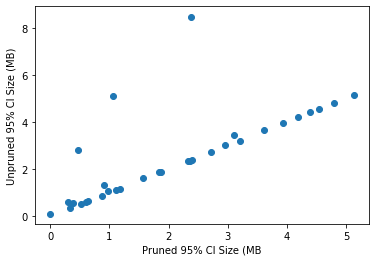

In [42]:
plt.scatter(ci["width.bp"]/1000000, ci_unpruned["width.bp"]/1000000)
plt.xlabel("Pruned 95% CI Size (MB")
plt.ylabel("Unpruned 95% CI Size (MB)")
plt.savefig("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals_pruned/confidence_intervals/plots/pruned_vs_unpruned_ci_size.pdf")

In [45]:
ci["diff"] = ci_unpruned["width.bp"] - ci["width.bp"]
ci = ci.sort_values(by="diff", ascending=False)
ci.head()

,phenotype,logP,chr,bp,quantile,delta.logP,from.bp,to.bp,width.bp,n.snps,...,fine.logP,fine.from.bp,fine.to.bp,fine.width.bp,fine.n.snps,fine.CI.logP,fine.CI.bp,fine.CI.from.bp,fine.CI.to.bp,diff
weight_17_37094289,weight,5.977264,17,37094289,0.95,1.920007,32590145.0,34969377.0,2379233.0,241.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6109741.0
EDL_2_80039850,EDL,7.998939,2,80039850,0.95,1.252510,77669072.0,78732375.0,1063304.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043220.0
soleus_6_18123198,soleus,7.024339,6,18123198,0.95,1.035613,17932055.0,18402294.0,470240.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2333753.0
bmd.a_11_96913720,bmd.a,20.131400,11,96913720,0.95,1.359296,96124433.0,97024165.0,899733.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439531.0
activity.middle_9_81879809,activity.middle,5.867419,9,81879809,0.95,1.737479,81041211.0,84145965.0,3104755.0,366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354606.0


# decorrelated thresholds

In [2]:
ci = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out/confidence_intervals/CI_pruned.txt")

In [5]:
ci = ci[ci["quantile"]==0.95]

In [6]:
ci

,phenotype,logP,chr,bp,quantile,delta.logP,from.bp,to.bp,width.bp,n.snps,fine.bp,fine.logP,fine.from.bp,fine.to.bp,fine.width.bp,fine.n.snps,fine.CI.logP,fine.CI.bp,fine.CI.from.bp,fine.CI.to.bp
4,activity30,8.494170,13,8139647,0.95,1.502116,7101524.0,8211378.0,1109855.0,4785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,activity.begin,10.094464,13,8153523,0.95,1.522924,8140492.0,8164881.0,24390.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,activity.end,10.357265,13,7101524,0.95,1.436075,7047417.0,8211378.0,1163962.0,4273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,activity.end,11.155589,13,8209788,0.95,1.494795,7464685.0,8209788.0,745104.0,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,activity.middle,8.771592,13,7101524,0.95,1.432916,7047417.0,8833396.0,1785980.0,6713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,activity.middle,10.663744,13,8209788,0.95,1.448536,8139647.0,8209788.0,70142.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,activity.middle,8.712946,13,8800578,0.95,1.512615,7047417.0,8833396.0,1785980.0,8637.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,activity.total,10.127980,13,7101524,0.95,1.462081,7047417.0,8800578.0,1753162.0,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,activity.total,11.986647,13,8144012,0.95,1.492642,8140492.0,8209788.0,69297.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,activity.total,9.891826,13,8800578,0.95,1.500641,7047417.0,8833396.0,1785980.0,6511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
z_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/COMBINED"
ld_dir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA"
ld_files = glob.glob(ld_dir+"/*_r2.txt")
outdir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals_pruned/confidence_intervals/plots"